# Exercise sheet 4

Practice problems for coursework II.

In [1]:
using Plots
using SparseArrays

## *Method of lines*

Write a program that evolves the advection equation

$$
    \partial_t u + c \partial_x u = 0
$$

For initial conditions $u(0, x) = f(x)$. Suppose $f(x) = \exp(-16x^2)$

In [2]:
f(x) = exp(-16x^2)

f (generic function with 1 method)

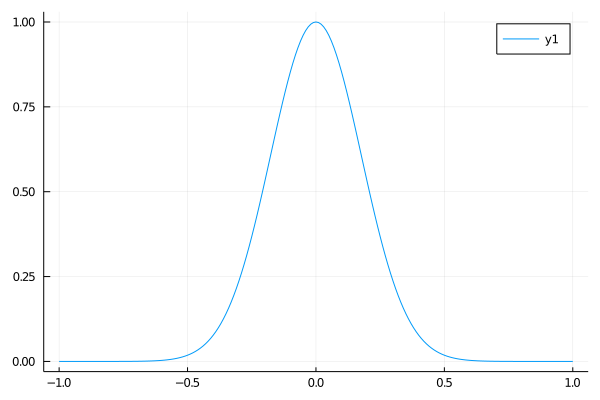

In [3]:
Δx = 0.01
xrange = -1:Δx:1
plot(xrange, f.(xrange))

We will discretize the pde as follows

$$
\frac{d{\bf u}}{dt} = c \mathbb{D}{\bf u}
$$

Which implies that the change in the system becomes

$$
{\bf u}(t_{n+1}) - {\bf u}(t_{n}) = \int_{t_n}^{t_{n+1}} \mathbb{D}{\bf u}(t) dt
$$

In [8]:
"""
# Build a differentiation matrix

This function builds a differentiation matrix required to compute
a second-order finite-differences method assuming equidistant points
"""
function build_diff_matrix(x_grid, Δx)
    n_grid = length(x_grid)
    D = spzeros(n_grid, n_grid)
    
    for row in 1:n_grid
        if row == 1
            # Left-difference formula
            D[row, row] = -3
            D[row, row + 1] = 4
            D[row, row + 2] = -1
        elseif row == n_grid
            # Right-difference formula
            D[row, row - 2] = 1
            D[row, row - 1] = -4
            D[row, row] = 3
        else
            # Central-difference formula
            D[row, row - 1] = -1
            D[row, row] = 0
            D[row, row + 1] = 1
        end
    end
    
    D = D ./ 2Δx
    return D
end


"""
# 2nd order finite-differences

Compute the 2nd order difference's method 
assuming a set of equidistant points
"""
function finite_differences(f, x_grid, Δx)
    D = build_diff_matrix(x_grid, Δx)
    fvals = f.(x_grid)
    f_prime_approx = D * fvals
    
    return f_prime_approx
end

finite_differences

### A small review: finite-differences

In order to compute the derivative using the 2nd-order finite-differences' method, we only require to compute the *fixed* derivative matrix $D$ and evaluate the set of observed points at the given function

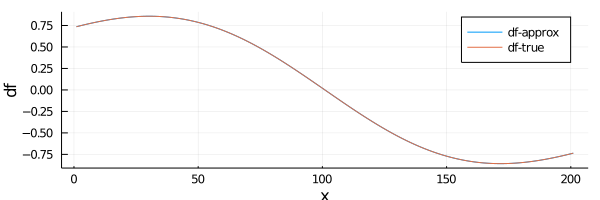

In [13]:
f(x) = exp(-x ^ 2.0)
f_prime(x) = -2.0 * exp(-x ^ 2.0)x

f_prime_vals = finite_differences(f, xrange, Δx)
f_prime_true = f_prime.(xrange)

plot(f_prime_vals, label="df-approx", size=(600, 200))
plot!(f_prime_true, label="df-true", ylabel="df", xlabel="x")

----